Dataset: \
Wright-stained Bone Marrow Aspirates \
https://rdr.ucl.ac.uk/articles/dataset/High_Magnification_Z-Stacks_from_Blood_Films/13402301?file=25809977

# **Prepprocessing Techniques**

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls
import sys
root_path = '/content/drive/My Drive/Dataset/' # This is the path to where in google drive the code is stored!
sys.path.append(root_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
drive  sample_data


###**Required libraries**

In [ ]:
!pip install image-similarity-measures

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 1.2 MB/s 
     |████████████████████████████████| 1.7 MB 41.0 MB/s 
  Created wheel for phasepack: filename=phasepack-1.5-py3-none-any.whl size=26984 sha256=7844bd8b11aded16e236a27f152bac1e3c141f17b8ed3780afa8f6298de18062
  Stored in directory: /root/.cache/pip/wheels/39/5c/b3/79292d7ac3f088e858805b5515b45cf5a365106397d936caf1
Successfully built phasepack


In [ ]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt
from PIL import Image
from math import log10, sqrt
from image_similarity_measures.quality_metrics import fsim
import glob
from skimage.metrics import structural_similarity as ssim

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix
from sklearn.model_selection import KFold
from PIL import Image, ImageFilter
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import warnings
import os
import shutil
from PIL import ImageFile
warnings.simplefilter('error', Image.DecompressionBombWarning)
ImageFile.LOAD_TRUNCATED_IMAGES = True
from PIL import Image
Image.MAX_IMAGE_PIXELS = 1000000000
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


###**MSE and PSNR functions:**

MSE : \

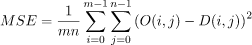

PSNR : \

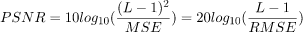

In [ ]:
def MSE(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    return mse

def PSNR(img1, img2):
    mse = MSE(img1, img2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr


###**Mean Filtering**

A method of ‘smoothing’ images by reducing the amount of intensity variation between neighbouring pixels. The average filter works by moving through the image pixel by pixel, replacing each value with the average value of neighbouring pixels, including itself.

In [ ]:
mse_mean_filtering_data = []
psnr_mean_filtering_data = []
ssim_mean_filtering_data = []
fsim_mean_filtering_data = []



for img in glob.glob(root_path + "train/edof/bm-aml/*.*"):
    print(img)
    img = cv2.imread(img)
    image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # convert to HSV
    figure_size = 9 # the dimension of the x and y axis of the kernal.
    new_image = cv2.blur(image,(figure_size, figure_size))
    #MSE
    mse = MSE(img, new_image)
    mse_mean_filtering_data.append(mse)
    #PSNR
    psnr = PSNR(img, new_image)
    psnr_mean_filtering_data.append(psnr)
    #SSIM
    (score, diff) = ssim(img, new_image, full=True, multichannel=True)
    ssim_mean_filtering_data.append(score)
    #FSIM
    fsim_val = fsim(img, new_image)
    fsim_mean_filtering_data.append(fsim_val)



/content/bm_aml/pos001_1_EDOF_RGB.tiff
/content/bm_aml/pos002_2_EDOF_RGB.tiff
/content/bm_aml/pos004_3_EDOF_RGB.tiff
/content/bm_aml/pos007_1_EDOF_RGB.tiff
/content/bm_aml/pos006_1_EDOF_RGB.tiff
/content/bm_aml/pos006_0_EDOF_RGB.tiff
/content/bm_aml/pos005_2_EDOF_RGB.tiff
/content/bm_aml/pos001_0_EDOF_RGB.tiff
/content/bm_aml/pos003_3_EDOF_RGB.tiff
/content/bm_aml/pos006_3_EDOF_RGB.tiff
/content/bm_aml/pos008_3_EDOF_RGB.tiff
/content/bm_aml/pos004_1_EDOF_RGB.tiff
/content/bm_aml/pos002_1_EDOF_RGB.tiff
/content/bm_aml/pos009_1_EDOF_RGB.tiff
/content/bm_aml/pos002_0_EDOF_RGB.tiff
/content/bm_aml/pos003_2_EDOF_RGB.tiff
/content/bm_aml/pos000_3_EDOF_RGB.tiff
/content/bm_aml/pos007_0_EDOF_RGB.tiff
/content/bm_aml/pos002_3_EDOF_RGB.tiff
/content/bm_aml/pos003_1_EDOF_RGB.tiff
/content/bm_aml/pos005_0_EDOF_RGB.tiff
/content/bm_aml/pos007_3_EDOF_RGB.tiff
/content/bm_aml/pos000_1_EDOF_RGB.tiff
/content/bm_aml/pos004_2_EDOF_RGB.tiff
/content/bm_aml/pos000_2_EDOF_RGB.tiff
/content/bm_aml/pos001_3_

In [ ]:
print(mse_mean_filtering_data)
print(psnr_mean_filtering_data)
print(ssim_mean_filtering_data)
print(fsim_mean_filtering_data)

[77.1365576171875, 82.33400957272377, 78.28227569203318, 78.24726689091435, 77.08653127411266, 79.49392771026234, 77.45134868103781, 79.67540738329475, 79.33352117091049, 79.48922085985726, 79.05260669849537, 73.72037669994214, 87.22523588204089, 79.84482723283179, 81.67255244502314, 79.61862009307485, 77.14664641203704, 79.09758168161652, 90.60353310667438, 80.43636586130401, 79.39441599151235, 77.4457383294753, 78.16258252555942, 77.40717930169752, 77.34028802565587, 77.92287471064814, 79.42764726803627, 80.27537254050925, 79.57335648148148, 77.92629665798611, 78.26839644820602]
[29.258201072196414, 28.97501095293539, 29.19416918612057, 29.1961118391363, 29.261018570622284, 29.12746405326475, 29.24051376220938, 29.117560681527692, 29.13623630252993, 29.127721207457135, 29.15164165839307, 29.454928151362807, 28.724382082894042, 29.10833575359043, 29.010042324195204, 29.120657145120234, 29.257633089703955, 29.14917155225917, 28.55935227442588, 29.076279200525462, 29.132904023873245, 29

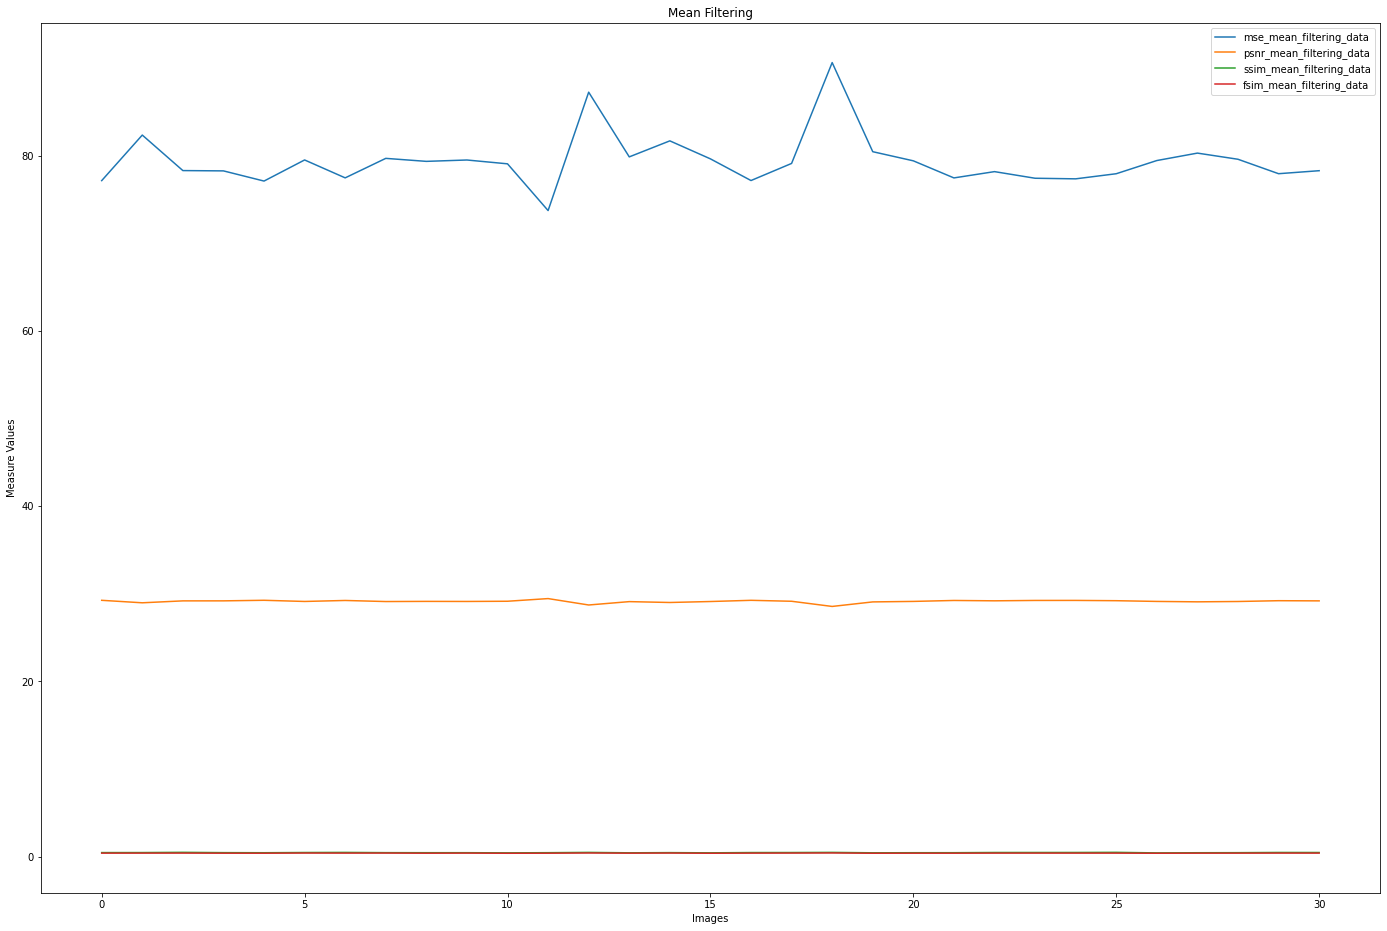

In [ ]:

plt.figure(figsize=(24,16))
plt.plot(mse_mean_filtering_data, label = "mse_mean_filtering_data")
plt.plot(psnr_mean_filtering_data, label = "psnr_mean_filtering_data")
plt.plot(ssim_mean_filtering_data, label = "ssim_mean_filtering_data")
plt.plot(fsim_mean_filtering_data, label = "fsim_mean_filtering_data")
plt.legend()
plt.xlabel('Images')
plt.ylabel('Measure Values')
plt.title('Mean Filtering')
plt.show()


###**Median Filtering**

Calculates the median of the pixel intensities that surround the center pixel in a nxn kernel. The median then replaces the pixel intensity of the center pixel. 

In [ ]:
mse_median_filtering_data = []
psnr_median_filtering_data = []
ssim_median_filtering_data = []
fsim_median_filtering_data = []

for img in glob.glob(root_path + "train/edof/bm-aml/*.*"):
    print(img)
    img = cv2.imread(img)
    image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # convert to HSV
    figure_size = 9 # the dimension of the x and y axis of the kernal.
    new_image = cv2.medianBlur(image, figure_size)
    #MSE
    mse = MSE(img, new_image)
    mse_median_filtering_data.append(mse)
    #PSNR
    psnr = PSNR(img, new_image)
    psnr_median_filtering_data.append(psnr)
    #SSIM
    (score, diff) = ssim(img, new_image, full=True, multichannel=True)
    ssim_median_filtering_data.append(score)
    #FSIM
    fsim_val = fsim(img, new_image)
    fsim_median_filtering_data.append(fsim_val)



/content/bm_aml/pos001_1_EDOF_RGB.tiff
/content/bm_aml/pos002_2_EDOF_RGB.tiff
/content/bm_aml/pos004_3_EDOF_RGB.tiff
/content/bm_aml/pos007_1_EDOF_RGB.tiff
/content/bm_aml/pos006_1_EDOF_RGB.tiff
/content/bm_aml/pos006_0_EDOF_RGB.tiff
/content/bm_aml/pos005_2_EDOF_RGB.tiff
/content/bm_aml/pos001_0_EDOF_RGB.tiff
/content/bm_aml/pos003_3_EDOF_RGB.tiff
/content/bm_aml/pos006_3_EDOF_RGB.tiff
/content/bm_aml/pos008_3_EDOF_RGB.tiff
/content/bm_aml/pos004_1_EDOF_RGB.tiff
/content/bm_aml/pos002_1_EDOF_RGB.tiff
/content/bm_aml/pos009_1_EDOF_RGB.tiff
/content/bm_aml/pos002_0_EDOF_RGB.tiff
/content/bm_aml/pos003_2_EDOF_RGB.tiff
/content/bm_aml/pos000_3_EDOF_RGB.tiff
/content/bm_aml/pos007_0_EDOF_RGB.tiff
/content/bm_aml/pos002_3_EDOF_RGB.tiff
/content/bm_aml/pos003_1_EDOF_RGB.tiff
/content/bm_aml/pos005_0_EDOF_RGB.tiff
/content/bm_aml/pos007_3_EDOF_RGB.tiff
/content/bm_aml/pos000_1_EDOF_RGB.tiff
/content/bm_aml/pos004_2_EDOF_RGB.tiff
/content/bm_aml/pos000_2_EDOF_RGB.tiff
/content/bm_aml/pos001_3_

In [ ]:
print(mse_median_filtering_data)
print(psnr_median_filtering_data)
print(ssim_median_filtering_data)
print(fsim_median_filtering_data)

[78.13462655526621, 80.24052420910493, 76.88036235291281, 77.8368497419946, 78.94977731963735, 77.68881630979938, 76.96809286988811, 78.81434407552084, 77.79801727671682, 78.91374077690972, 78.45550286940586, 76.30945824893904, 84.27851044077931, 78.95711413724923, 79.25961027922453, 78.50378924334491, 78.1835898919753, 77.77168722270447, 88.50597993827161, 79.26868718653549, 79.74752580054012, 77.87528802565586, 76.10684576340664, 77.65891631703317, 78.22319474585262, 77.4693822337963, 78.74532359182099, 79.69208399643132, 78.36342327353395, 76.80729853877315, 78.46327329282407]
[29.20236820086639, 29.086866036125528, 29.272649392836485, 29.218951102694085, 29.157294514632945, 29.227218564108874, 29.26769635206769, 29.164750953335794, 29.221118319598865, 29.159277299777237, 29.184569504592567, 29.30501990531013, 28.873635096920136, 29.15689094270819, 29.14028428297425, 29.181897409665005, 29.199647531692044, 29.2225883998194, 28.661077459163444, 29.13978695210964, 29.11363143092814, 2

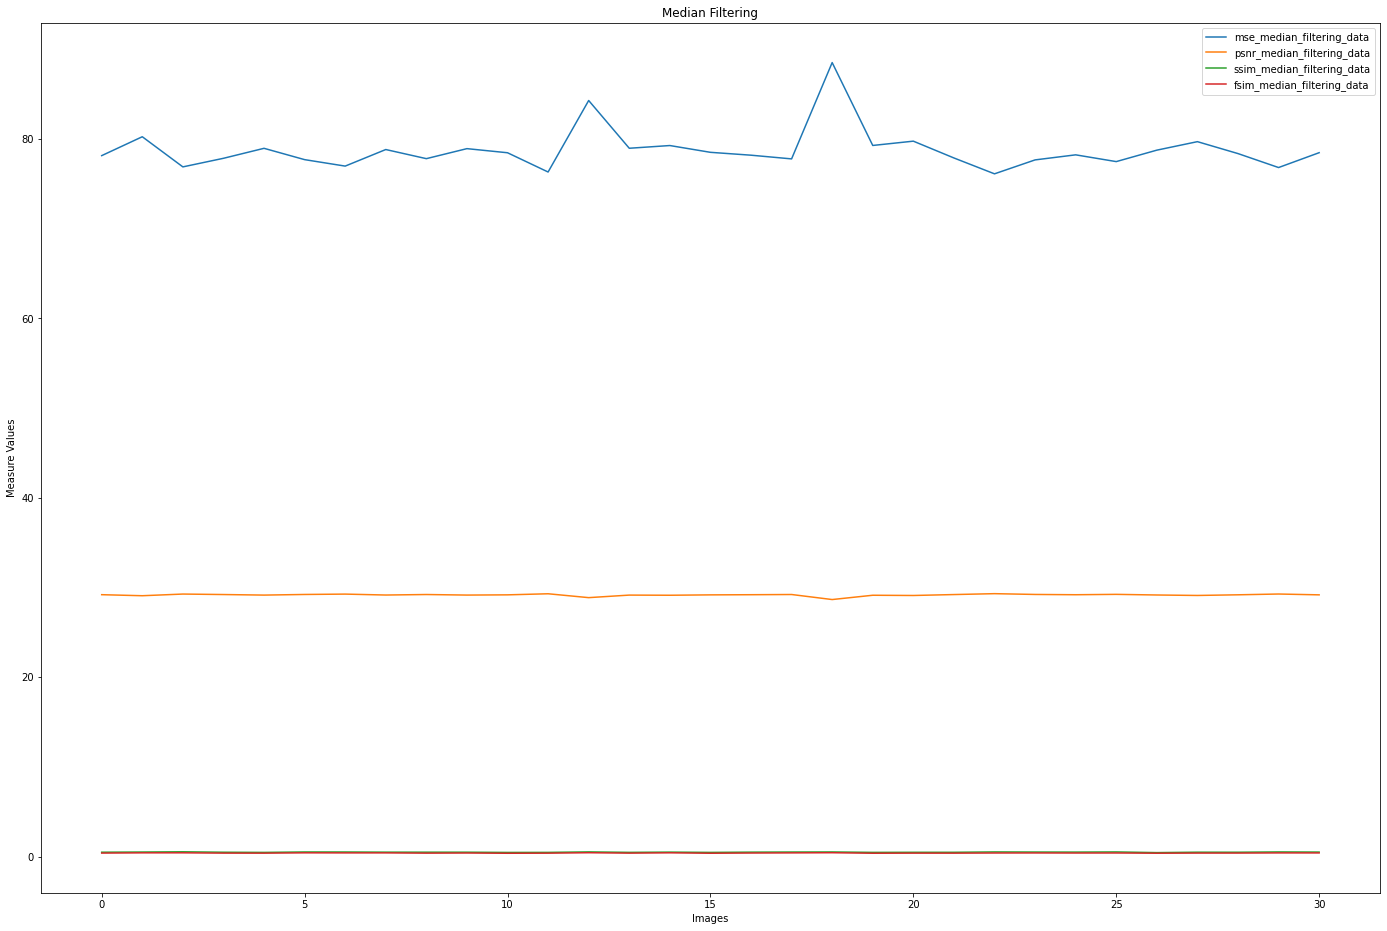

In [ ]:

plt.figure(figsize=(24,16))
plt.plot(mse_median_filtering_data, label = "mse_median_filtering_data")
plt.plot(psnr_median_filtering_data, label = "psnr_median_filtering_data")
plt.plot(ssim_median_filtering_data, label = "ssim_median_filtering_data")
plt.plot(fsim_median_filtering_data, label = "fsim_median_filtering_data")
plt.legend()
plt.xlabel('Images')
plt.ylabel('Measure Values')
plt.title('Median Filtering')
plt.show()

### **Geometric Mean Filtering**

Formula : \
 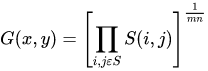

 
 Where S(x,y) is the original image, and the filter mask is m by n pixels.

log((x1 * x2 * ... * xn)^(1/n)) = (1/n) * (log(x1) + log(x2) + ... + log(xn))

In [ ]:
mse_geomean_filtering_data = []
psnr_geomean_filtering_data = []
ssim_geomean_filtering_data = []
fsim_geomean_filtering_data = []

for img in glob.glob(root_path + "train/edof/bm-aml/*.*"):
    print(img)
    img = cv2.imread(img, cv2.IMREAD_GRAYSCALE).astype(float)
    rows, cols = img.shape[:2]
    print(img.shape)
    print(img.shape[2])
    
    ksize = 5

    padsize = int((ksize-1)/2)
    pad_img = cv2.copyMakeBorder(img, *[padsize]*4, cv2.BORDER_DEFAULT)
    geomean1 = np.zeros_like(img)
    for r in range(rows):
        for c in range(cols):
            geomean1[r, c] = np.prod(pad_img[r:r+ksize, c:c+ksize])**(1/(ksize**2))
    new_image = np.uint8(geomean1)

    #MSE
    mse = MSE(img, new_image)
    mse_geomean_filtering_data.append(mse)
    #PSNR
    psnr = PSNR(img, new_image)
    psnr_geomean_filtering_data.append(psnr)
    #SSIM
    (score, diff) = ssim(img, new_image, full=True, multichannel=True)
    ssim_geomean_filtering_data.append(score)
    #FSIM
    fsim_val = fsim(np.asarray(img), np.asarray(new_image))
    fsim_geomean_filtering_data.append(fsim_val)



In [ ]:
print(mse_geomean_filtering_data)
print(psnr_geomean_filtering_data)
print(ssim_geomean_filtering_data)
print(fsim_geomean_filtering_data)

In [ ]:

plt.figure(figsize=(24,16))
plt.plot(mse_geomean_filtering_data, label = "mse_geomean_filtering_data")
plt.plot(psnr_geomean_filtering_data, label = "psnr_geomean_filtering_data")
plt.plot(ssim_geomean_filtering_data, label = "ssim_geomean_filtering_data")
plt.plot(fsim_geomean_filtering_data, label = "fsim_geomean_filtering_data")
plt.legend()
plt.xlabel('Images')
plt.ylabel('Measure Values')
plt.title('Geometric Mean Filtering')
plt.show()

In [ ]:
#geomean2 = np.uint8(np.exp(cv2.boxFilter(np.log(img), -1, (ksize, ksize))))

### **Gamma Equalization**

In [ ]:
mse_gammaeq_data = []
psnr_gammaeq_data = []
ssim_gammaeq_data = []
fsim_gammaeq_data = []

mse_data = []
psnr_data = []
ssim_data = []
fsim_data = []


def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)


for img in glob.glob(root_path + "train/edof/bm-aml/*.*"):
  print(img)
  img = cv2.imread(img)
  # loop over various values of gamma
  for gamma in np.arange(0.0, 3.5, 0.5):
    # ignore when gamma is 1 (there will be no change to the image)
    if gamma == 1:
      continue
    # apply gamma correction and show the images
    gamma = gamma if gamma > 0 else 0.1
    new_image = adjust_gamma(img, gamma=gamma)
    #cv2.putText(new_image, "g={}".format(gamma), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)

    print(f"Gamma Value : {gamma}")

    #MSE
    mse = MSE(img, new_image)
    mse_data.append(mse)
    #PSNR
    psnr = PSNR(img, new_image)
    psnr_data.append(psnr)
    #SSIM
    (score, diff) = ssim(img, new_image, full=True, multichannel=True)
    ssim_data.append(score)
    #FSIM
    fsim_val = fsim(np.asarray(img), np.asarray(new_image))
    fsim_data.append(fsim_val)

  mse_gammaeq_data.append(np.min(mse_data))
  psnr_gammaeq_data.append(np.min(psnr_data))
  ssim_gammaeq_data.append(np.min(ssim_data))
  fsim_gammaeq_data.append(np.min(fsim_data))

/content/bm_aml/pos006_3_EDOF_RGB.tiff
Gamma Value : 0.1
Gamma Value : 0.5
Gamma Value : 1.5
Gamma Value : 2.0
Gamma Value : 2.5
Gamma Value : 3.0
/content/bm_aml/pos007_1_EDOF_RGB.tiff
Gamma Value : 0.1
Gamma Value : 0.5
Gamma Value : 1.5
Gamma Value : 2.0
Gamma Value : 2.5
Gamma Value : 3.0
/content/bm_aml/pos007_3_EDOF_RGB.tiff
Gamma Value : 0.1
Gamma Value : 0.5
Gamma Value : 1.5
Gamma Value : 2.0
Gamma Value : 2.5
Gamma Value : 3.0
/content/bm_aml/pos008_3_EDOF_RGB.tiff
Gamma Value : 0.1
Gamma Value : 0.5
Gamma Value : 1.5
Gamma Value : 2.0
Gamma Value : 2.5
Gamma Value : 3.0
/content/bm_aml/pos007_0_EDOF_RGB.tiff
Gamma Value : 0.1
Gamma Value : 0.5
Gamma Value : 1.5
Gamma Value : 2.0
Gamma Value : 2.5
Gamma Value : 3.0
/content/bm_aml/pos008_2_EDOF_RGB.tiff
Gamma Value : 0.1
Gamma Value : 0.5
Gamma Value : 1.5
Gamma Value : 2.0
Gamma Value : 2.5
Gamma Value : 3.0
/content/bm_aml/pos009_1_EDOF_RGB.tiff
Gamma Value : 0.1
Gamma Value : 0.5
Gamma Value : 1.5
Gamma Value : 2.0
Gamma V

In [ ]:
print(mse_gammaeq_data)
print(psnr_gammaeq_data)
print(ssim_gammaeq_data)
print(fsim_gammaeq_data) 

[101.86356529706791, 101.86356529706791, 101.86356529706791, 101.86356529706791, 101.86356529706791, 101.86356529706791, 101.86356529706791]
[27.12173358891591, 27.12173358891591, 27.12173358891591, 26.961259169795394, 26.961259169795394, 26.917512847659317, 26.917512847659317]
[0.08048233437866177, 0.08048233437866177, 0.08048233437866177, 0.08048233437866177, 0.06541374553032375, 0.06541374553032375, 0.06541374553032375]
[0.5960076643770355, 0.589913880151319, 0.589913880151319, 0.589913880151319, 0.5439900067475482, 0.5439900067475482, 0.5439900067475482]


In [ ]:

plt.figure(figsize=(24,16))
plt.plot(mse_gammaeq_data, label = "mse_gammaeq_data")
plt.plot(psnr_gammaeq_data, label = "psnr_gammaeq_data")
plt.plot(ssim_gammaeq_data, label = "ssim_gammaeq_data")
plt.plot(fsim_gammaeq_data, label = "fsim_gammaeq_data")
plt.legend()
plt.xlabel('Images')
plt.ylabel('Measure Values')
plt.title('Gamma Equalization')
plt.show() 

### **Gaussian low-pass filtering**

In [ ]:
mse_gauss_low_pass_filtering_data = []
psnr_gauss_low_pass_filtering_data = []
ssim_gauss_low_pass_filtering_data = []
fsim_gauss_low_pass_filtering_data = []

for img in glob.glob(root_path + "train/edof/bm-aml/*.*"):
    print(img)
    img = cv2.imread(img)
    
    new_image = cv2.GaussianBlur(img,(5,5),0)

    #MSE
    mse = MSE(img, new_image)
    mse_gauss_low_pass_filtering_data.append(mse)
    #PSNR
    psnr = PSNR(img, new_image)
    psnr_gauss_low_pass_filtering_data.append(psnr)
    #SSIM
    (score, diff) = ssim(img, new_image, full=True, multichannel=True)
    ssim_gauss_low_pass_filtering_data.append(score)
    #FSIM
    fsim_val = fsim(np.asarray(img), np.asarray(new_image))
    fsim_gauss_low_pass_filtering_data.append(fsim_val)




/content/bm_aml/pos001_1_EDOF_RGB.tiff
/content/bm_aml/pos002_2_EDOF_RGB.tiff
/content/bm_aml/pos004_3_EDOF_RGB.tiff
/content/bm_aml/pos007_1_EDOF_RGB.tiff
/content/bm_aml/pos006_1_EDOF_RGB.tiff
/content/bm_aml/pos006_0_EDOF_RGB.tiff
/content/bm_aml/pos005_2_EDOF_RGB.tiff
/content/bm_aml/pos001_0_EDOF_RGB.tiff
/content/bm_aml/pos003_3_EDOF_RGB.tiff
/content/bm_aml/pos006_3_EDOF_RGB.tiff
/content/bm_aml/pos008_3_EDOF_RGB.tiff
/content/bm_aml/pos004_1_EDOF_RGB.tiff
/content/bm_aml/pos002_1_EDOF_RGB.tiff
/content/bm_aml/pos009_1_EDOF_RGB.tiff
/content/bm_aml/pos002_0_EDOF_RGB.tiff
/content/bm_aml/pos003_2_EDOF_RGB.tiff
/content/bm_aml/pos000_3_EDOF_RGB.tiff
/content/bm_aml/pos007_0_EDOF_RGB.tiff
/content/bm_aml/pos002_3_EDOF_RGB.tiff
/content/bm_aml/pos003_1_EDOF_RGB.tiff
/content/bm_aml/pos005_0_EDOF_RGB.tiff
/content/bm_aml/pos007_3_EDOF_RGB.tiff
/content/bm_aml/pos000_1_EDOF_RGB.tiff
/content/bm_aml/pos004_2_EDOF_RGB.tiff
/content/bm_aml/pos000_2_EDOF_RGB.tiff
/content/bm_aml/pos001_3_

In [ ]:
print(mse_gauss_low_pass_filtering_data)
print(psnr_gauss_low_pass_filtering_data)
print(ssim_gauss_low_pass_filtering_data)
print(fsim_gauss_low_pass_filtering_data) 

[5.771968376253858, 4.991647195698302, 5.909989149305556, 5.75274269386574, 5.697827329282408, 5.484550962094907, 5.590640130690587, 5.783894314236111, 5.840745141300155, 5.63235237027392, 5.888111074942129, 6.014118381076389, 4.289090952932098, 5.759570855034722, 5.641062222704475, 5.980878423996914, 5.8404852671682095, 5.452026728877315, 4.030329258294753, 5.855143651138118, 5.820057689525463, 5.986028706114969, 5.702947289737654, 5.833413869598766, 5.74637996720679, 5.709723186728395, 5.876231372974537, 5.566213228202161, 5.779919945987654, 5.654358241705247, 5.643172200520834]
[40.51756417874047, 41.14836478579768, 40.41493677347239, 40.532054113397706, 40.57371076911468, 40.73939284593894, 40.65618823230118, 40.50860012121444, 40.466121044898486, 40.62390543626174, 40.43104366810981, 40.339083884266174, 41.80715105037393, 40.52690235471363, 40.61719470710294, 40.363153864651515, 40.46631428122303, 40.765223845461634, 42.07739833530927, 40.455428062705806, 40.48153071386682, 40.359

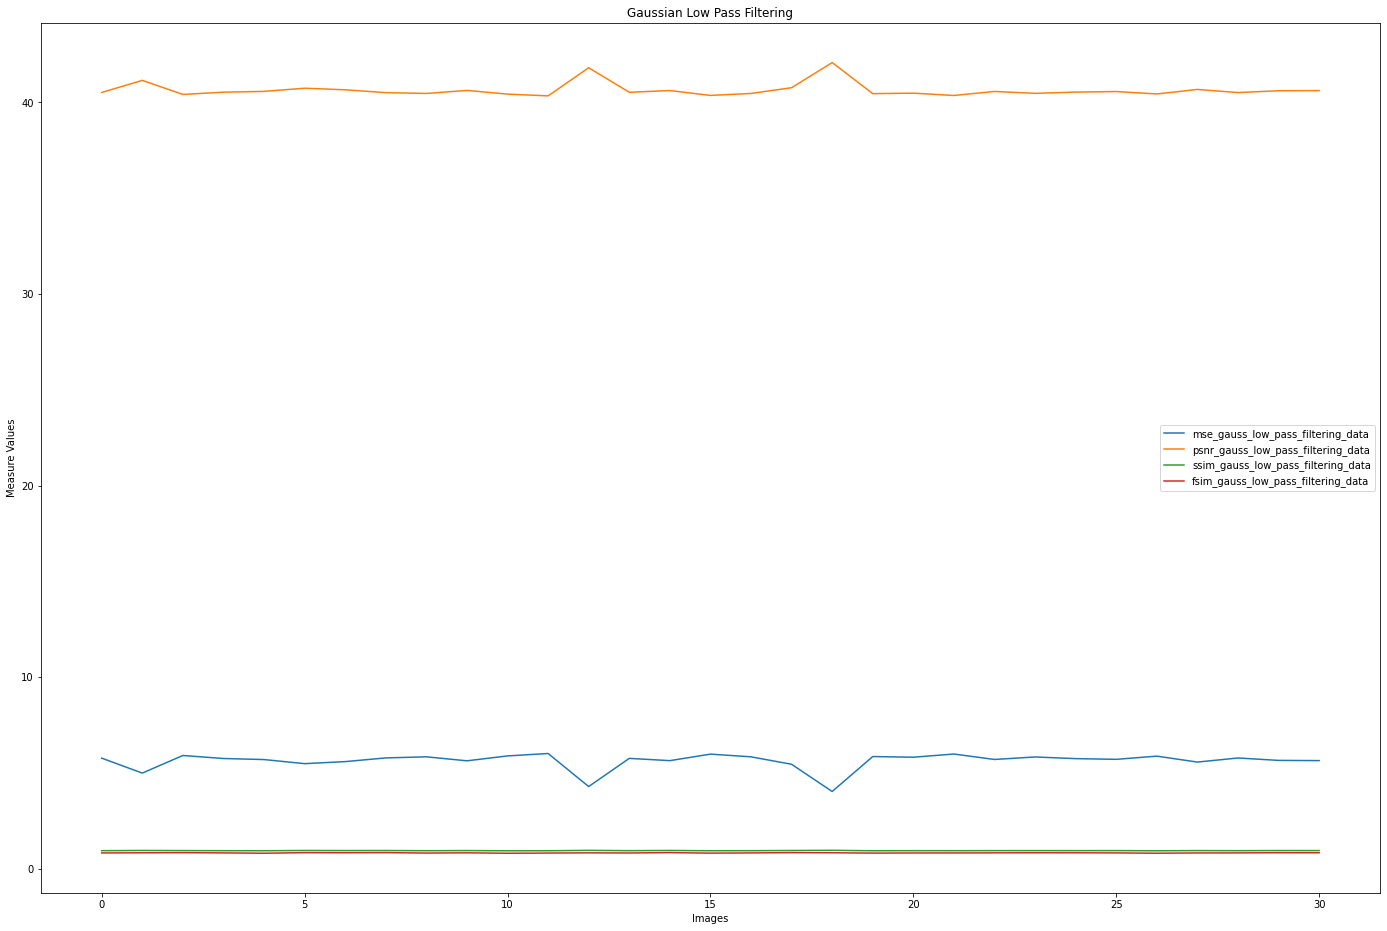

In [ ]:
plt.figure(figsize=(24,16))
plt.plot(mse_gauss_low_pass_filtering_data, label = "mse_gauss_low_pass_filtering_data")
plt.plot(psnr_gauss_low_pass_filtering_data, label = "psnr_gauss_low_pass_filtering_data")
plt.plot(ssim_gauss_low_pass_filtering_data, label = "ssim_gauss_low_pass_filtering_data")
plt.plot(fsim_gauss_low_pass_filtering_data, label = "fsim_gauss_low_pass_filtering_data")
plt.legend()
plt.xlabel('Images')
plt.ylabel('Measure Values')
plt.title('Gaussian Low Pass Filtering')
plt.show() 

### **Gamma Transformation**

In [ ]:

mse_gamma_trans_data = []
psnr_gamma_trans_data = []
ssim_gamma_trans_data = []
fsim_gamma_trans_data = []

mse_data = []
psnr_data = []
ssim_data = []
fsim_data = []



for img in glob.glob(root_path + "train/edof/bm-aml/*.*"):
    print(img)
    img = cv2.imread(img)
    
    # Trying 4 gamma values.
    for gamma in [0.1, 0.5, 1.2, 2.2]:
        # Apply gamma correction.
        new_image = np.array(255*(img / 255) ** gamma, dtype = 'uint8')

        #MSE
        mse = MSE(img, new_image)
        mse_data.append(mse)
        #PSNR
        psnr = PSNR(img, new_image)
        psnr_data.append(psnr)
        #SSIM
        (score, diff) = ssim(img, new_image, full=True, multichannel=True)
        ssim_data.append(score)
        #FSIM
        fsim_val = fsim(np.asarray(img), np.asarray(new_image))
        fsim_data.append(fsim_val)

    mse_gamma_trans_data.append(np.min(mse_data))
    psnr_gamma_trans_data.append(np.min(psnr_data))
    ssim_gamma_trans_data.append(np.min(ssim_data))
    fsim_gamma_trans_data.append(np.min(fsim_data))



/content/bm_aml/pos001_1_EDOF_RGB.tiff
/content/bm_aml/pos002_2_EDOF_RGB.tiff
/content/bm_aml/pos004_3_EDOF_RGB.tiff
/content/bm_aml/pos007_1_EDOF_RGB.tiff
/content/bm_aml/pos006_1_EDOF_RGB.tiff
/content/bm_aml/pos006_0_EDOF_RGB.tiff
/content/bm_aml/pos005_2_EDOF_RGB.tiff
/content/bm_aml/pos001_0_EDOF_RGB.tiff
/content/bm_aml/pos003_3_EDOF_RGB.tiff
/content/bm_aml/pos006_3_EDOF_RGB.tiff


In [ ]:
print(mse_gamma_trans_data)
print(psnr_gamma_trans_data)
print(ssim_gamma_trans_data)
print(fsim_gamma_trans_data) 

In [ ]:
plt.figure(figsize=(24,16))
plt.plot(mse_geomean_filtering_data, label = "mse_gamma_trans_data")
plt.plot(psnr_geomean_filtering_data, label = "psnr_gamma_trans_data")
plt.plot(ssim_geomean_filtering_data, label = "ssim_gamma_trans_data")
plt.plot(fsim_geomean_filtering_data, label = "fsim_gamma_trans_data")
plt.legend()
plt.xlabel('Images')
plt.ylabel('Measure Values')
plt.title('Gamma Transformation')
plt.show() 

### **Perona-Malik denoising model**

In [ ]:
""" Perona Malik Diffusion
    for Edge Detection
"""

from scipy import misc, ndimage

# SETTINGS:
iterations = 30
delta = 0.14
kappa = 15

mse_perona_malik_data = []
psnr_perona_malik_data = []
ssim_perona_malik_data = []
fsim_perona_malik_data = []

# center pixel distances
dx = 1
dy = 1
dd = np.sqrt(2)

# 2D finite difference windows
windows = [
    np.array([[0, 1, 0], [0, -1, 0], [0, 0, 0]], np.float64),
    np.array([[0, 0, 0], [0, -1, 0], [0, 1, 0]], np.float64),
    np.array([[0, 0, 0], [0, -1, 1], [0, 0, 0]], np.float64),
    np.array([[0, 0, 0], [1, -1, 0], [0, 0, 0]], np.float64),
    np.array([[0, 0, 1], [0, -1, 0], [0, 0, 0]], np.float64),
    np.array([[0, 0, 0], [0, -1, 0], [0, 0, 1]], np.float64),
    np.array([[0, 0, 0], [0, -1, 0], [1, 0, 0]], np.float64),
    np.array([[1, 0, 0], [0, -1, 0], [0, 0, 0]], np.float64),
]


for img in glob.glob(root_path + "train/edof/bm-aml/*.*"):
    print(img)

    # convert input image
    #img = imageio.imread(img, as_gray=True)
    img = cv2.imread(img, 0)
    img = img.astype('float64')

    # initial condition
    u = img

    for r in range(iterations):
        # approximate gradients
        nabla = [ ndimage.filters.convolve(u, w) for w in windows ]

        # approximate diffusion function
        diff = [ 1./(1 + (n/kappa)**2) for n in nabla]

        # update image
        terms = [diff[i]*nabla[i] for i in range(4)]
        terms += [(1/(dd**2))*diff[i]*nabla[i] for i in range(4, 8)]
        u = u + delta*(sum(terms))


    # Kernel for Gradient in x-direction
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.int32)
    # Kernel for Gradient in y-direction
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.int32)
    # Apply kernels to the image
    Ix = ndimage.filters.convolve(u, Kx)
    Iy = ndimage.filters.convolve(u, Ky)

    # return norm of (Ix, Iy)
    G = np.hypot(Ix, Iy)


    #MSE
    mse = MSE(img, u)
    mse_perona_malik_data.append(mse)
    #PSNR
    psnr = PSNR(img, u)
    psnr_perona_malik_data.append(psnr)
    #SSIM
    (score, diff) = ssim(img, u, full=True, multichannel=True)
    ssim_perona_malik_data.append(score)
    #FSIM
    fsim_val = fsim(np.asarray(img), np.asarray(u))
    fsim_perona_malik_data.append(fsim_val)



In [ ]:
print(mse_perona_malik_data)
print(psnr_perona_malik_data)
print(ssim_perona_malik_data)
print(fsim_perona_malik_data) 

In [ ]:
plt.figure(figsize=(24,16))
plt.plot(mse_perona_malik_data, label = "mse_perona_malik_data")
plt.plot(psnr_perona_malik_data, label = "psnr_perona_malik_data")
plt.plot(ssim_perona_malik_data, label = "ssim_perona_malik_data")
plt.plot(fsim_perona_malik_data, label = "fsim_perona_malik_data")
plt.legend()
plt.xlabel('Images')
plt.ylabel('Measure Values')
plt.title('Perona Malik Denoising Model')
plt.show()  

###**10-Fold Cross Validation**

In [ ]:
datasetFolderName=root_path
sourceFiles=[]
classLabels=['edof', 'stacks']
subClassLabels=['bm-aml', 'bm-nhl']

X=[]
Y=[]

img_rows, img_cols =  2560, 2160 # input image dimensions
test_path=datasetFolderName+'/test/'
train_path=datasetFolderName+'/train/'

In [ ]:
def prepareNameWithLabels(folderName1, folderName2):
    sourceFiles=os.listdir(datasetFolderName+'/train/'+folderName1+'/'+folderName2)
    for val in sourceFiles:
        X.append(val)
        for i in range(len(classLabels)):
            if(folderName1==classLabels[i]):
                Y.append(i)

In [ ]:
# Organize file names and class labels in X and Y variables
for i in range(len(classLabels)):
    prepareNameWithLabels(classLabels[i], subClassLabels[0])
    prepareNameWithLabels(classLabels[i], subClassLabels[1])

In [ ]:
X=np.asarray(X)
Y=np.asarray(Y)

In [ ]:
kf = KFold(n_splits=10, random_state=None, shuffle=False)
kf.get_n_splits(X)
print(kf)

KFold(n_splits=10, random_state=None, shuffle=False)


In [ ]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "\nTEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    print('\n')

TRAIN: [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81
 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99] 
TEST: [0 1 2 3 4 5 6 7 8 9]


TRAIN: [ 0  1  2  3  4  5  6  7  8  9 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81
 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99] 
TEST: [10 11 12 13 14 15 16 17 18 19]


TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81
 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99] 
TEST: [20 21 22 23 24 25 26 27 28 29]


TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 



---

